In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [3]:
evaluation_data = pd.read_csv('./results/results_26_05_2022_18_48_41.csv')

# Results Analysis

In [4]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
evaluation_data.head(10)

,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time (s),LastTokenQuery,EquivalenceQuery,OT Prefixes,OT Suffixes,Tree Depth,Inner Nodes,LogProbError,WER,NDCG,OOPartition,OOTolerance,AbsoluteError
0,WLStarLearner,PDFA - 57b8a9feeed8423f859cb1767f169285,198,198,1,20.848298,2397,4,401.0,6.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
1,WLStarLearner,PDFA - 57b8a9feeed8423f859cb1767f169285,198,198,2,20.997383,2397,4,401.0,6.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
2,WLStarLearner,PDFA - 57b8a9feeed8423f859cb1767f169285,198,198,3,20.432050,2397,4,401.0,6.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
3,WLStarLearner,PDFA - 57b8a9feeed8423f859cb1767f169285,198,198,4,20.492172,2397,4,401.0,6.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
4,WLStarLearner,PDFA - 57b8a9feeed8423f859cb1767f169285,198,198,5,21.224558,2397,4,401.0,6.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
5,WLStarLearner,PDFA - 57b8a9feeed8423f859cb1767f169285,198,198,6,20.497958,2397,4,401.0,6.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
6,WLStarLearner,PDFA - 57b8a9feeed8423f859cb1767f169285,198,198,7,20.702989,2397,4,401.0,6.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
7,WLStarLearner,PDFA - 57b8a9feeed8423f859cb1767f169285,198,198,8,20.551392,2397,4,401.0,6.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
8,WLStarLearner,PDFA - 57b8a9feeed8423f859cb1767f169285,198,198,9,21.187322,2397,4,401.0,6.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0
9,WLStarLearner,PDFA - 23f5e74f06f346a09d6eba84e2526485,211,211,1,26.744129,3439,6,431.0,8.0,NaN,NaN,0.0,0.0,1.0,0,0,0.0


In [6]:
import math
evaluation_data['OT_SIZE'] = evaluation_data['OT Prefixes']*evaluation_data['OT Suffixes']
evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']
evaluation_data['STRUCTURE_SIZE'] = evaluation_data.apply(lambda row : row['TREE_SIZE'] if math.isnan(row['OT_SIZE']) else row['OT_SIZE'], axis = 1)

In [ ]:
evaluation_data['DISTRIBUTIONS'] = 

In [19]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

funcs =  ['median', IQR]    
grouped_multiple = evaluation_data.groupby(['Algorithm', 'Number of States']).agg({'Time (s)':funcs, 'LastTokenQuery':funcs, 'EquivalenceQuery':funcs, 'LogProbError':funcs,'WER':funcs,'NDCG':funcs,'OOPartition':funcs, 'OOTolerance':funcs, 'Extracted Number of States':funcs, 'STRUCTURE_SIZE':funcs, 'AbsoluteError': funcs, 'Tree Depth':funcs })
grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'LogProbError_median','LogProbError_IQR',
'WER_median','WER_IQR','NDCG_median','NDCG_IQR','OOPartition_median','OOPartition_IQR', 'OOTolerance_median','OOTolerance_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR', 'STRUCTURE_SIZE_median', 'STRUCTURE_SIZE_IQR', 'AbsoluteError_median', 'AbsoluteError_IQR', 'TreeDepth_median', 'TreeDepth_IQR']
grouped_multiple.reset_index(inplace = True)

In [20]:
grouped_multiple

,Algorithm,Number of States,Time(s)_median,Time(s)_IQR,MembershipQuery_median,MembershipQuery_IQR,EquivalenceQuery_median,EquivalenceQuery_IQR,LogProbError_median,LogProbError_IQR,...,OOTolerance_median,OOTolerance_IQR,Extracted Number of States_median,Extracted Number of States_IQR,STRUCTURE_SIZE_median,STRUCTURE_SIZE_IQR,AbsoluteError_median,AbsoluteError_IQR,TreeDepth_median,TreeDepth_IQR
0,QuantNaryTreeLearner,181,10.281951,0.138078,3006.0,0.00,100.0,0.00,0.000000,0.000000,...,0.0,0.0,181.0,0.00,279.0,0.00,0.000000e+00,0.000000e+00,7.0,0.0
1,QuantNaryTreeLearner,183,7.477084,0.647919,2280.0,258.00,76.0,7.00,0.000000,0.000000,...,0.0,0.0,183.0,0.00,257.0,7.00,0.000000e+00,0.000000e+00,4.0,1.0
2,QuantNaryTreeLearner,186,7.146337,0.993924,2181.0,0.00,67.0,0.00,0.000000,0.000000,...,0.0,0.0,186.0,0.00,251.0,0.00,0.000000e+00,0.000000e+00,4.0,0.0
3,QuantNaryTreeLearner,189,9.000719,0.077265,2523.0,0.00,89.0,0.00,0.000000,0.000000,...,0.0,0.0,189.0,0.00,276.0,0.00,0.000000e+00,0.000000e+00,5.0,0.0
4,QuantNaryTreeLearner,190,8.875704,0.064993,2346.0,0.00,82.0,0.00,0.000000,0.000000,...,0.0,0.0,190.0,0.00,270.0,0.00,0.000000e+00,0.000000e+00,4.0,0.0
5,QuantNaryTreeLearner,191,9.386094,0.089589,2676.0,0.00,92.0,0.00,0.000000,0.000000,...,0.0,0.0,191.0,0.00,281.0,0.00,0.000000e+00,0.000000e+00,6.0,0.0
6,QuantNaryTreeLearner,192,8.654246,0.096631,2595.0,0.00,85.0,0.00,0.000000,0.000000,...,0.0,0.0,192.0,0.00,275.0,0.00,0.000000e+00,0.000000e+00,4.0,0.0
7,QuantNaryTreeLearner,194,10.940876,5.794441,2859.0,618.00,98.0,36.00,0.000000,0.000000,...,0.0,0.0,194.0,0.00,290.0,36.00,0.000000e+00,0.000000e+00,6.0,2.0
8,QuantNaryTreeLearner,195,8.263733,5.519265,2514.0,921.00,80.0,38.00,0.000000,0.000000,...,0.0,0.0,195.0,0.00,273.0,38.00,0.000000e+00,0.000000e+00,5.0,2.0
9,QuantNaryTreeLearner,196,8.937031,2.108731,2397.0,273.00,82.0,11.25,0.000000,0.000004,...,0.0,0.0,196.0,0.25,275.5,12.00,0.000000e+00,4.400000e-07,4.5,1.5


In [21]:
len(grouped_multiple)

46

Text(0, 0.5, 'Learning Time Median (s)')

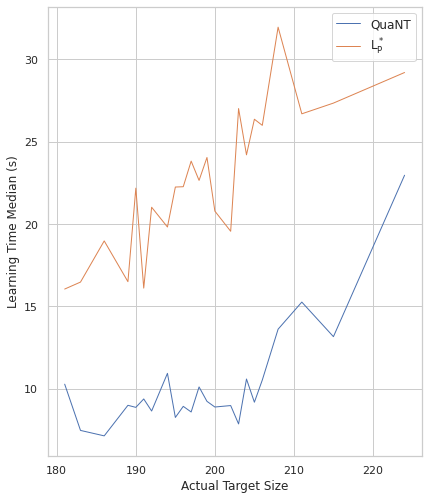

In [22]:
grouped_multiple["LOG_Time(s)_median"] = np.log(grouped_multiple["Time(s)_median"])
grouped_multiple = grouped_multiple.loc[grouped_multiple["Algorithm"] != 'WLStarColLearner' ]

import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="Time(s)_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
#plt.legend(labels=["QuaNT","$\mathrm{L_{P}^*Col}$", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Learning Time Median (s)", fontsize = 12)

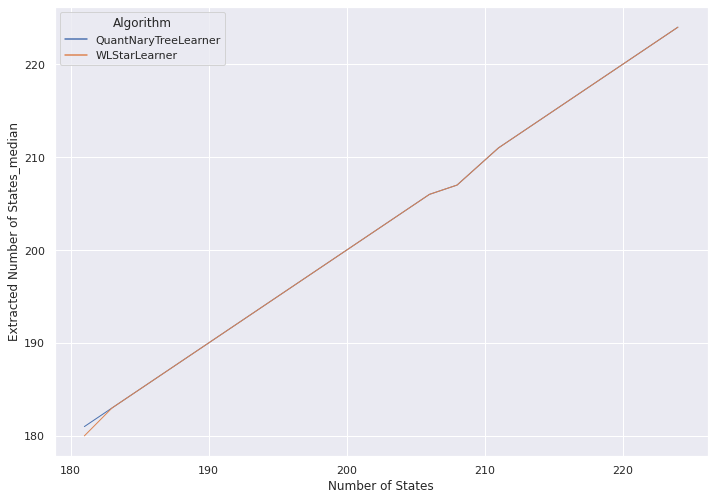

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x="Number of States", y="Extracted Number of States_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)

Text(0, 0.5, 'Speedup')

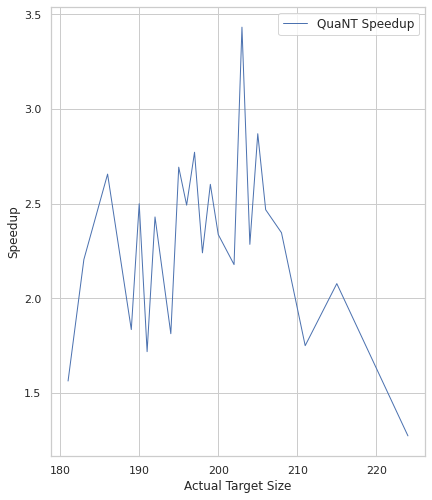

In [24]:
times_QuaNT = np.array(grouped_multiple["Time(s)_median"][0:23])
times_WLStar = np.array(grouped_multiple["Time(s)_median"][23:])
speedup_Q_WL = times_WLStar / times_QuaNT
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})

sns.set_style("whitegrid")
ax = sns.lineplot(x=grouped_multiple['Number of States'][0:23], y=speedup_Q_WL,  linewidth=1)
plt.legend(labels=["QuaNT Speedup"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Speedup", fontsize = 12)

Text(0, 0.5, 'Structure Size Median')

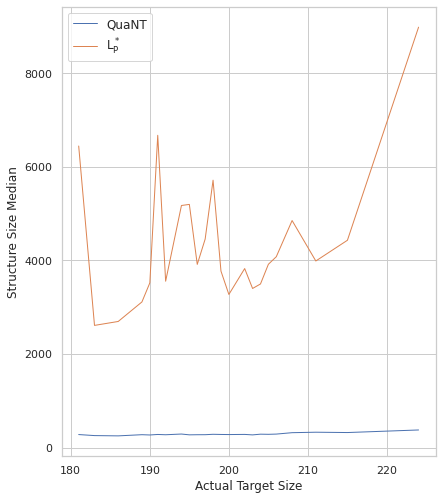

In [25]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="STRUCTURE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Structure Size Median", fontsize = 12)

# Tree Depth Analysis

In [26]:
evaluation_data_Quant = evaluation_data.loc[evaluation_data["Algorithm"] == 'QuantNaryTreeLearner' ]
evaluation_data_Quant.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time (s)', 'LastTokenQuery',
       'EquivalenceQuery', 'OT Prefixes', 'OT Suffixes', 'Tree Depth',
       'Inner Nodes', 'LogProbError', 'WER', 'NDCG', 'OOPartition',
       'OOTolerance', 'AbsoluteError', 'OT_SIZE', 'TREE_SIZE',
       'STRUCTURE_SIZE'],
      dtype='object')

In [27]:
evaluation_data_Quant['Tree Depth'].value_counts()

4.0    207
5.0    117
6.0     63
7.0     45
3.0      9
8.0      9
Name: Tree Depth, dtype: int64

Text(0, 0.5, 'Tree Depth')

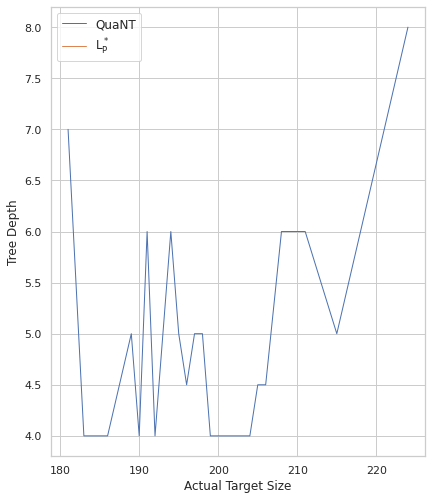

In [28]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Number of States", y="TreeDepth_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Tree Depth", fontsize = 12)